# <img style="float: left; padding-right: 10px; width: 45px" src="styles/iacs.png"> S-109A Introduction to Data Science 

## Homework 1

**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader

---


## Main Theme: Data Collection - Web Scraping - Data Parsing 
#### Learning Objectives 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you read the data from a file, then you scrape them directly from a website. You look for specific pieces of information by parsing the data, you clean the data to prepare them for analysis, and finally, you answer some questions.

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables in Canvas are: a) This python notebook with your code and answers, b) a .pdf version of this notebook, c) The BibTex file you created.
d) The JSON file you created.
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.

In [615]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


## Part A [50 pts]:  Help a professor convert his publications to bibTex

### Overview

In Part 1 your goal is to parse the HTML page of a Professor containing some of his publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 44 publications in descending order from No. 244 to No. 200.

You are to use python's **regular expressions**, a powerful way of parsing text. You may **not** use any parsing tool such as Beautiful Soup yet. In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML, the stuff the web is made of.
- JavaScript Object Notation(JSON), a text-based open standard designed for transmitting structured data over the web.

### <p class='q1'> Question 1: Parsing using Regular Expressions 
 **1.1** Write a function called `get_pubs` that takes a .html filename as an input and returns a string containing the HTML page in this file (see definition below). Call this function using `data/publist_super_clean.html` as input and name the returned string `prof_pubs`. 
 
 **1.2** Calculate how many times the author named '`C.M. Friend`' appears in the list of publications. 
 
 **1.3** Find all unique journals and copy them in a variable named `journals`.  
 
 **1.4** Create a list named `pub_authors` whose elements are strings containing the authors' names for each paper. 
    
### Hints
- Look for patterns in the HTML tags that reveal where each piece of information such as the title of the paper, the names of the authors, the journal name, is stored. For example, you might notice that the journal name(s) is contained between the &lt;I&gt; HTML tag.
- Each publication has multiple authors. 
- `C.M. Friend` also shows up as `Cynthia M. Friend` in the file.  Count just `C. M. Friend`. 
- There is a comma at the end of the string of authors. You can choose to keep it in the string or remove it and put it back when you write the string as a BibTex entry. 
- You want to remove duplicates from the list of journals. 

### Resources
- **Regular expressions:** a) https://docs.python.org/3.3/library/re.html, b) https://regexone.com, and c) https://docs.python.org/3/howto/regex.html. 
- ** HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet. 
- ** Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp. 

#### 1.1

In [616]:
# import the regular expressions library
import re

In [617]:
# use this file 
pub_filename = 'data/publist_super_clean.html'

In [618]:
# your code here
def get_pubs(filename: str) -> str:
    with open(filename,'r') as f:
        data = f.read()
        return data

prof_pubs = get_pubs(pub_filename)

In [619]:
# check your code 
print(prof_pubs)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<TITLE>Kaxiras E journal publications</TITLE>
<HEAD>
<meta http-equiv="Content-Type" content="text/html;charset=UTF-8">
<LINK REL="stylesheet" TYPE="text/css" HREF="../styles/style_pubs.css">
<META NAME="description" CONTENT="">
<META NAME="keywords" CONTENT="Kaxiras E, Multiscale Methods, Computational Materials" >
</HEAD>

<BODY>

<OL START=244>
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAd

#### 1.2

In [620]:
# your code here
regex = r"C.M. Friend"
Find_C = re.findall(regex,prof_pubs)
print(len(Find_C))

5


#### 1.3

In [621]:
# your code here

#In this HTML, every journal name is in between <I> , </I>.
# just find something between; (.*)
regex2 = r"<I>(.*)</I>"
Find_journals = re.findall(regex2,prof_pubs)
journals = set(Find_journals)
journals.remove('Ab initio')


In [622]:
# check your code: print journals
journals

{'2010 ACM/IEEE International Conference for High Performance ',
 'ACSNano. ',
 'Acta Mater. ',
 'Catal. Sci. Technol. ',
 'Chem. Eur. J. ',
 'Comp. Phys. Comm. ',
 'Concurrency Computat.: Pract. Exper. ',
 'Energy & Environmental Sci. ',
 'Int. J. Cardiovasc. Imaging ',
 'J. Chem. Phys. ',
 'J. Chem. Theory Comput. ',
 'J. Phys. Chem. B ',
 'J. Phys. Chem. C ',
 'J. Phys. Chem. Lett. ',
 'J. Stat. Mech: Th. and Exper. ',
 'Langmuir ',
 'Molec. Phys. ',
 'Nano Lett. ',
 'NanoLett. ',
 'New J. Phys. ',
 'New Journal of Physics ',
 'PHYSICAL REVIEW B ',
 'Phil. Trans. R. Soc. A ',
 'Phys. Rev. B ',
 'Phys. Rev. E - Rap. Comm. ',
 'Phys. Rev. Lett. ',
 'Sci. Model. Simul. ',
 'Sol. St. Comm. ',
 'Top. Catal. '}

Your output should look like this (remember, no duplicates):
```
'ACSNano.',
 'Ab initio',
 'Ab-initio',
 'Acta Mater.',
 'Acta Materialia',
 'Appl. Phys. Lett.',
 'Applied Surface Science',
 'Biophysical J.',
 'Biosensing Using Nanomaterials',

 ...

 'Solid State Physics',
 'Superlattices and Microstructures',
 'Surf. Sci.',
 'Surf. Sci. Lett.',
 'Surface  Science',
 'Surface Review and Letters',
 'Surface Sci. Lett.',
 'Surface Science Lett.',
 'Thin Solid Films',
 'Top. Catal.',
 'Z'}
```

#### 1.4

In [623]:
# our code here
#find between <br> and , 
regex3 = r'<BR>(.*),'
pub_authors = re.findall(regex3, prof_pubs)

In [624]:
# check your code: print the list of strings containing the author(s)' names
for item in pub_authors:
    print (item)

Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng
Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras
Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi
J R Maze, A Gali, E Togan, Y Chu, A Trifonov
Kejie Zhao, Wei L. Wang, John Gregoire, Matt Pharr, Zhigang Suo
 Masataka Katono, Takeru Bessho, Sheng Meng, Robin Humphry-Baker, Guido Rothenberger
 Thomas D. Kuhne, Tod A. Pascal, Efthimios Kaxiras, and Yousung Jung
 Sheng Meng, Efthimios Kaxiras, Md. K. Nazeeruddin, and Michael Gratzel
 Bingjun Xu, Jan Haubrich, Thomas A. Baker, Efthimios Kaxiras, and Cynthia M. Friend
 Jun Ren, Sheng Meng, Yi-Lin Wang, Xu-Cun Ma, Qi-Kun Xue, Efthimios Kaxiras
 Jan Haubrich, Efthimios Kaxiras, and Cynthia M. Friend
 Thomas A. Baker, Bingjun Xu, Stephen C. Jensen, Cynthia M. Friend and Efthimios Kaxi

Your output should look like this (a line for each paper's author(s) string, with or without the comma)<BR><br>
S. Meng and E. Kaxiras,<br>
G. Lu and E. Kaxiras,<br>
E. Kaxiras and S. Yip,<br>
...<BR>
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,<BR>
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,<BR>
E Kaxiras, and M D Lukin,<BR>

<hr style="height:1px">

### Question 2: Parsing and Converting to bibTex using Beautiful Soup

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which has the following format:
```
@article { _number_
     author = John Doyle
     title = Interaction between atoms
     URL = Papers/PhysRevB_81_085406_2010.pdf
     journal = Phys. Rev. B
     volume = 81
}
```

```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
```
About the [bibTex format](http://www.bibtex.org).

In Question 2 you are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex format. We used regular expressions for parsing HTML in the previous question but just regular expressions are hard to use in parsing real-life websites. A useful tool is [BeautifulSoup]  (http://www.crummy.com/software/BeautifulSoup/) (BS). You will parse the same file, this time using BS, which makes parsing HTML a lot easier.

**2.1** Write a function called `make_soup` that accepts a filename for an HTML file and returns a BS object.
    
**2.2** Write a function that reads in the BS object, parses it, converts it into the .bibTex format using python string manipulation and regular expressions, and writes the data into `publist.bib`. You will need to create that file in your folder.  

    
#### HINT
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper. You had already done this in Part 1 when you figured out how to get the name of the journal from the HTML code. The `find_all` method of BeautifulSoup might be useful.
- Question 2.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper.
- Make sure you catch exceptions when needed.
- Regular expressions are a great tool for string manipulation. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>

In [625]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from sys import argv
from urllib.request import urlopen
from urllib.error import HTTPError

#### 2.1

In [626]:
# your code here

# definition of make_soup
def make_soup(filename: str) -> BeautifulSoup:   
    with open(filename, 'r') as f:
        data = f.read()
    A = BeautifulSoup(data, 'html.parser')
    return A

soup = make_soup(pub_filename)


In [627]:
# check your code: print the Beautiful Soup object, you should see an HTML page
print (soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look like this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

#### 2.2

In [628]:
# your code here 

#recap ; open HTML function
def beatiful(filename: str)-> BeautifulSoup:    
    with open(filename, 'r') as f:
        data = f.read()
    soup = BeautifulSoup(data, 'html.parser')
    return soup

soup = beatiful(pub_filename)
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

In [629]:
#bib function ; make bib file and convert, parse.

def bib(filename:str):
    
    with open(filename, 'w') as bibfile:
        regex3 = r'<BR>(.*),'
        regex2 = r'<I>(.*)</I>'
        authors = re.findall(regex3, prof_pubs)
        title = [i.get_text(strip=True) for i in soup.find_all('a')]
        URL= [i['href'] for i in soup.find_all('a',href=True)]
        journals = re.findall(regex2,prof_pubs)
        journals.remove('Ab initio')
        volumn = [i.get_text(strip=True) for i in soup.find_all('b')]
        for i in range(len(volumn)):
            bibtex = """@ARTICLE
              author = {0},
              title = {1},
              URL = {2},
              journals = {3},
              volume = {4},
            """.format(authors[i],title[i],URL[i],journals[i],volumn[i])
            bibfile.write(bibtex)

#try to make it; run the function
prof_bibtex = 'publist.bib'
bib(prof_bibtex)

In [631]:
# check your code: print the BibTex file
f = open('publist.bib','r')
print (f.read())

@ARTICLE
              author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
              title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons",
              URL = Papers/2011/PhysRevB_84_125411_2011.pdf,
              journals = PHYSICAL REVIEW B ,
              volume = 84,
            @ARTICLE
              author = JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
              title = "Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles",
              URL = Papers/2011/PhysRevB_84_035325_2011.pdf,
              journals = PHYSICAL REVIEW B ,
              volume = 84,
            @ARTICLE
              author = Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
              title = "Influence of CH2 content and network defects on the elastic properties of organosilicate glasses",
              URL = Papers/2011/PhysRevB_83_05420

Your output should look like this
```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

...

@article
{    author = E. Kaxiras and S. Succi
     title = "Multiscale simulations of complex systems: computation meets reality"
     URL = Papers/SciModSim_15_59_2008.pdf
     journal = Sci. Model. Simul.
     volume = 15
}
@article
{    author = E. Manousakis, J. Ren, S. Meng and E. Kaxiras
     title = "Effective Hamiltonian for FeAs-based superconductors"
     URL = Papers/PhysRevB_78_205112_2008.pdf
     journal = Phys. Rev. B
     volume = 78
}
```

---

## Part B [50 pts]:  Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview

In Part 3 your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: a) how many performers made their first movie at 17? b) how many performers started as child actors? c) who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2017? . These questions are addressed in more details in the Questions below. 

When data is **not** given to us in a file, we need to fetch them using one of the following ways:
- download a file from a source URL
- query a database 
- query a web API 
- scrape data from the web page

### Question 1: Web Scraping Using Beautiful Soup
**1.1** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**1.2** Create a Beautiful Soup object named `star_soup` giving `my_page` as input.

**1.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). One of the fields of this dictionary is the `url` of each star's individual page, which you need to scrape and save the contents in the `page` field. Note that there is a ton of information about each star on these webpages. 

**1.4** Write a function called `create_star_table` to extract information about each star (see function definition for the exact information to extract). **Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

**1.5** Now that you have scraped all the info you need, it's a good practice to save the last data structure you created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. Save this information to a JSON file and **submit** this JSON file in Canvas with your notebook. 

**1.6** Import the contents of the teaching staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made first movie (name this column `age_at_first_movie`).

**1.7** You are now ready to answer the following intriguing questions: 
- How many performers made their first movie at 17?
- How many performers started as child actors? Define child actor as a person less than 12 years old. 
- Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

**1.8** Make a plot of the number of credits versus the name of actor/actress. 
 


### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply some operation to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these before performing calculations on the data! 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests powerful and easy. For more on the `requests` library see http://docs.python-requests.org/

In [632]:
import requests

#### 1.1

In [633]:
# your code here

my_page= requests.get("https://www.imdb.com/list/ls025814950/")

my_page.text
my_page.content
#.text shows us every element in this URL to Unicode. 
#.contetn shows us bytes.
# The difference between content is when we call the image data in URL, .content show it as bytes.

my_page.status_code
#Output is 200. Which means that it was successful to response it.
#EX) 404 = Not Found, 405 = Forbidden etc


200

<HR> Your answers here

<HR>

#### 1.2

In [634]:
# your code here
star_soup = BeautifulSoup(my_page.content, "html.parser")

In [635]:
# check your code - you should see an HTML page
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

#### 1.3

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: the string containing the soup of the text in their individual info page (from url)

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [636]:
# your code here
import pandas as pd

def parse_stars(data):
    #find name in <h3> line and get text with line comprehension.
    name = [i.get_text(strip=True).split('.')[1] for i in data.find_all('h3')[:100]] #Until 100th list.
    # find Actor or Actress in the page
    gender = [i.get_text(strip=True).split('|')[0] for i in data.find_all('p',attrs={'class' : "text-muted text-small"})]
    # And convert Actor or Actress to 0 , 1 
    gender= [0 if i =='Actor' else 1 for i in gender]
    #find a line that has url in the page
    urldata = [i for i in data.find_all('h3')]
    #find url in above data
    url = [urldata[i].a['href'] for i in range(100)]
    # i will use baseurl to combine each person's url
    baseurl ="https://www.imdb.com"
    df = pd.DataFrame({'name': [], 'gender' : [], 'url':[],'page': []},columns=['name', 'gender', 'url','page'])
    for i in range(100): #until 100th.
        load = BeautifulSoup(requests.get("{0}".format(baseurl+url[i])).content , 'html.parser').prettify()[:100] #explain below
        # it was too large to load everything, so just print until 100 elements. 
        # my computer is not accepted to print whole result.
        page = load #just convert value's name 
        # find corresponding each value to get dataframe in a for loop
        df = df.append({'name': name[i], 'gender': str(gender[i]), 'url':baseurl+url[i], 'page':page}, ignore_index=True)
        #change gender format to str; because pandas defalut shows decimal point. I erase it with change format.
    return df.to_dict('records')

starlist = parse_stars(star_soup)


In [637]:
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element


#Make output pretty ; using json dump because the answer below looks like json format

# and i want to encapsulate result ("page" part, if you want to see whole, you can change)
import json
print(json.dumps(starlist[0], indent = 4, separators=(',', ': ')))

{
    "name": "Gal Gadot",
    "gender": "1",
    "url": "https://www.imdb.com/name/nm2933757?ref_=nmls_hd",
    "page": "<!DOCTYPE html>\n<html xmlns:fb=\"http://www.facebook.com/2008/fbml\" xmlns:og=\"http://ogp.me/ns#\">\n <h"
}


Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

#### 1.4

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

1.4 Write a function called create_star_table to extract information about each star (see function definition for the exact information to extract). Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

In [655]:
# your code here

def create_star_table(starlist: list) -> list:
    df = pd.DataFrame({'star_name': [], 'gender' : [], 'year_born':[],'first_movie': [],
                      'year_first_movie' : [], 'credits' : []},
                      columns=['star_name', 'gender', 'year_born','first_movie','year_first_movie','credits'])
    
    # Why using if is the input data is 'list' so i want to use for loop. but when the input has 1 length of list
    # it won't be working. so it is almost same but if input has 1 values, just No for loop.
    # technically, almost same function, but looks ugly, sorry
    
    if type(starlist) == dict:
        star_name = starlist['name'] # starlist, input, is dictionary. so i can call key by ['key']
        url = starlist['url'] 
        gender = starlist['gender']  #because basically starlist has 
        data = BeautifulSoup(requests.get("{0}".format(url)).text , 'html.parser')  #use starlist's url to load
        year_born = [i['datetime'] for i in data.findAll('time') if i.has_attr('datetime')][0] #get date time in time line
        
        #find line has a credit value, and parsing one more time.
        credits = [i.get_text(strip=True) for i in data.find_all('div', attrs={'id' :'filmography'})]
        credits = re.findall('\d+', str(credits))
        credits = int(credits[0]) #change to list via [0] and int.
        movie = [i.get_text(strip=True) for i in data.find_all('b')] #find movies name 
        first_movie = movie[credits-1]  #and get first movie by using credit number; -1 because python list start with 0
        year_first_movie = [i.get_text(strip=True)for i in data.find_all('span',attrs={'class' : 'year_column'})]
        year_first_movie = year_first_movie[credits-1]
        df = df.append({'star_name': star_name, 'gender' : str(gender), 'year_born':year_born,'first_movie': first_movie,
                      'year_first_movie' : year_first_movie, 'credits' : credits}, ignore_index=True)
    
    else:      #same as above except use i with for loop; every startlist value in its list.
        for i in starlist:
            star_name = i['name']
            url = i['url']
            gender = i['gender'][0]
            data = BeautifulSoup(requests.get("{0}".format(url)).text , 'html.parser')
            year_born = [i['datetime'] for i in data.findAll('time') if i.has_attr('datetime')][0]
            credits = [i.get_text(strip=True) for i in data.find_all('div', 
                                                                     attrs={'id' :'filmography'})]
            credits = re.findall('\d+', str(credits))
            credits = int(credits[0])
            movie = [i.get_text(strip=True) for i in data.find_all('b')]
            first_movie = movie[credits-1]
            year_first_movie = [i.get_text(strip=True)for i in data.find_all('span',attrs={'class' : 'year_column'})]
            year_first_movie = year_first_movie[credits-1]
            df = df.append({'star_name': star_name, 'gender' : str(gender), 'year_born':year_born,'first_movie': first_movie,
                          'year_first_movie' : year_first_movie, 'credits' : credits}, ignore_index=True)
    return df.to_dict('records')



In [657]:
# RUN THIS CELL ONLY ONCE - IT WILL TAKE SOME TIME TO RUN
star_table = []
star_table = create_star_table(starlist[0])
print(star_table)

[{'star_name': 'Gal Gadot', 'gender': '1', 'year_born': '1985-4-30', 'first_movie': 'Bubot', 'year_first_movie': '2007', 'credits': 25.0}]


In [658]:
# check your code

#change format again to show result pretty.

print(json.dumps(star_table,indent=4,separators=(',', ': ')))

[
    {
        "star_name": "Gal Gadot",
        "gender": "1",
        "year_born": "1985-4-30",
        "first_movie": "Bubot",
        "year_first_movie": "2007",
        "credits": 25.0
    }
]


Your output should look like this:
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

#### 1.5

In [641]:
# your code here

import json
#open and write json file
with open('data.json', 'w') as outfile:  
    Data =json.dumps(star_table,indent=3,separators=(',', ': '))
    
    json.dump(Data,outfile)

#### 1.6

In [664]:
# your code here
with open('data/staff_starinfo.json') as f:
    starinfo_json = json.load(f)
starinfo_json = json.dumps(starinfo_json)
df = pd.read_json(starinfo_json)
df.head()

,credits,first_movie,gender,name,year_born,year_first_movie
0,25,Bubot,1,Gal Gadot,1985,2007
1,55,Tommaso,0,Tom Hardy,1977,2001
2,17,Doctors,1,Emilia Clarke,1986,2009
3,51,All My Children,1,Alexandra Daddario,1986,2002-2003
4,30,Järngänget,0,Bill Skarsgård,1990,2000


#### 1.7.1

In [662]:
# your code

#use regular expression to 
regex = re.compile(r"^\d{4}")
df['year_first_movie_new'] = df['year_first_movie'].str.findall(regex)
df['year_first_movie_new'] = df['year_first_movie_new'].str[0]

#df.to_numeric
#df['year_born_new'].astype('int')
#df[['year_born','year_born_new']] = [df['year_born'].split['-'][0] for i in df['year_born']]
#df['year_born'], df['year_first_movie'] = df['year_born'].str.split('-', 1).str
df['age']= df['year_first_movie_new'].astype('int') - df['year_born'].astype('int')
print(len(df[df["age"]==17]))
print(len(df[df["age"]<17]))
df.loc[df['credits'].idxmax(), 'name']

8
36


'Sean Young'

# 8 performers made their first movie at 17
# 36 performers started as child actors
# Sean Young is the most prolific actress with 122 credits

Your output should look like this:<BR>
8 performers made their first movie at 17
---------

1.7 You are now ready to answer the following intriguing questions:


#### 1.7.2

#### 1.8

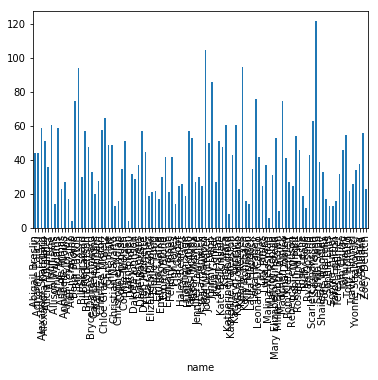

In [671]:
# your code here

#groupby name and credits series and making bar plot.

#i tried to find the other way to show credits versus name, but couldn't. :(

df.groupby("name")['credits'].mean().plot(kind="bar")#,subplots=True, layout=(2,1))     #probably subplots, but not working!


<HR>
1.8 Make a plot of the number of credits versus the name of actor/actress.
Your answer here

<HR>

In [646]:
from IPython.core.display import HTML
def css_styling(): styles = open("styles/cs109.css", "r").read(); return HTML(styles)
css_styling()